In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
path =""

In [ ]:
df = pd.read_csv(path+'train.csv')

In [ ]:
df.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23473 entries, 0 to 23472
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             23473 non-null  object
 1   feedback_text  23473 non-null  object
 2   toxic          23473 non-null  int64 
 3   abusive        23473 non-null  int64 
 4   vulgar         23473 non-null  int64 
 5   menace         23473 non-null  int64 
 6   offense        23473 non-null  int64 
 7   bigotry        23473 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ MB


# Exploratory Data Analysis (EDA)
To better understand the dataset, we’ll begin with the following analyses:

Label Distribution:
Visualize the frequency of each toxicity label to identify class imbalance.

Text Characteristics:
Analyze sentence structure by exploring:

Comment lengths (both character count and word count)

Most frequent words and terms used

Data Quality Checks:
Detect and handle:

Missing values

Outliers in text length or unusual patterns

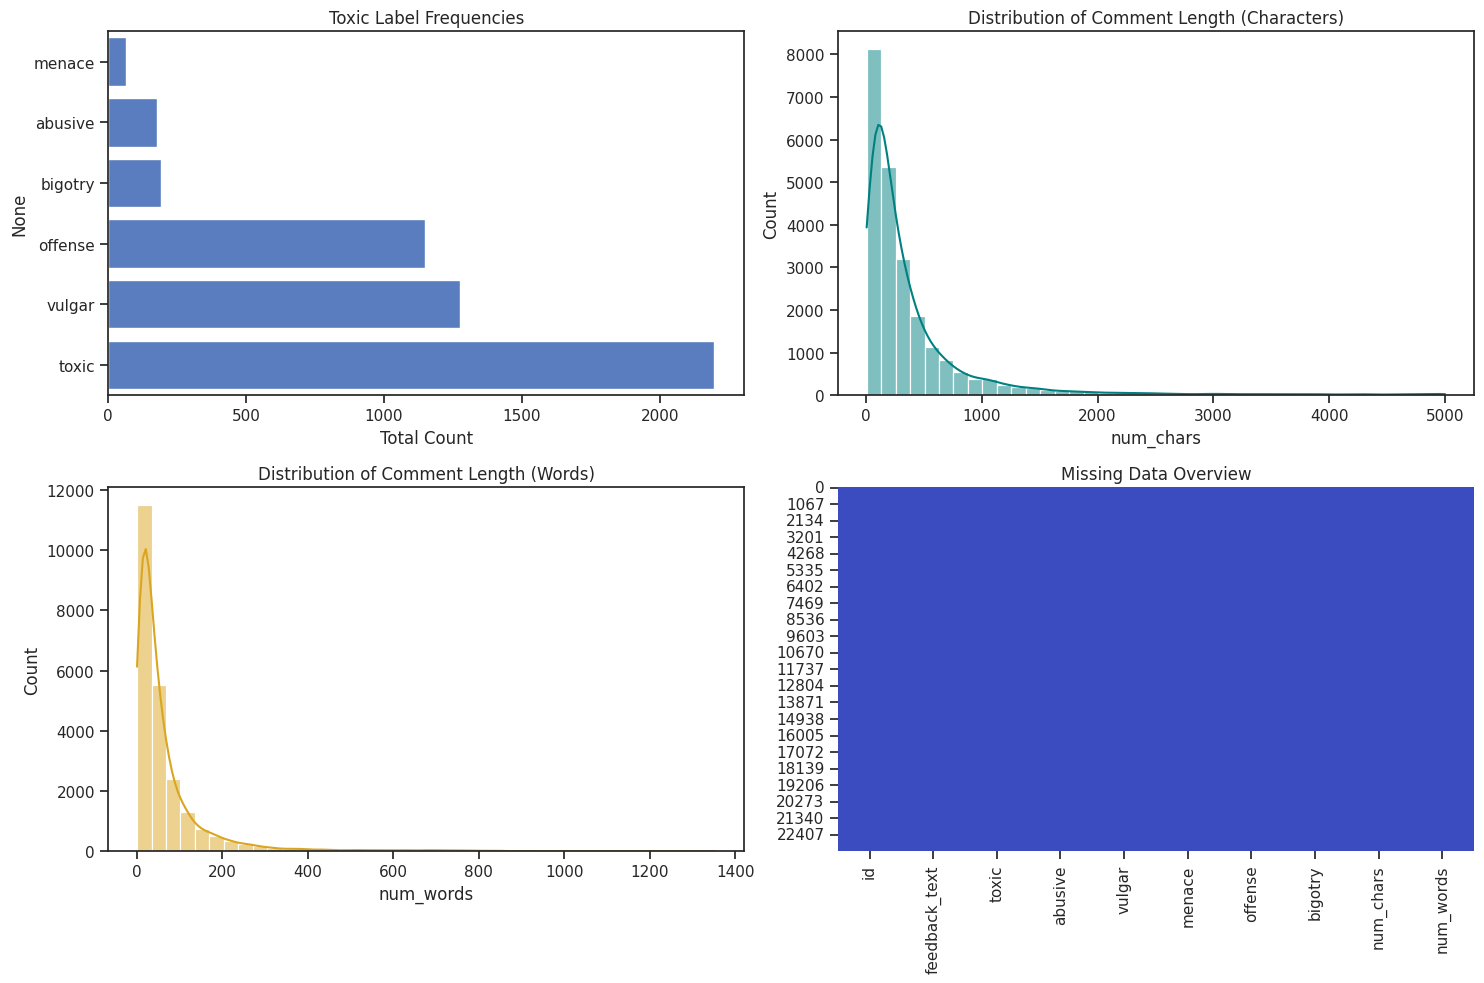

Missing Values Summary:
 id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
num_chars        0
num_words        0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization aesthetics
sns.set_theme(style="ticks", palette="muted")

# Toxicity label columns
labels = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']

# --- Label Distribution ---
label_totals = df[labels].sum().sort_values()

# --- Sentence Structure Analysis ---
df['num_chars'] = df['feedback_text'].astype(str).apply(len)
df['num_words'] = df['feedback_text'].astype(str).apply(lambda x: len(x.split()))

# --- Missing Values ---
null_summary = df.isnull().sum()

# Create figure with 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Barplot for label frequencies
sns.barplot(x=label_totals.values, y=label_totals.index, ax=axes[0, 0])
axes[0, 0].set_title("Toxic Label Frequencies")
axes[0, 0].set_xlabel("Total Count")

# Histogram for character counts
sns.histplot(df['num_chars'], bins=40, kde=True, color='teal', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Comment Length (Characters)")

# Histogram for word counts
sns.histplot(df['num_words'], bins=40, kde=True, color='goldenrod', ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Comment Length (Words)")

# Heatmap of missing values
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title("Missing Data Overview")

# Final layout tweaks
plt.tight_layout()
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", null_summary)


# Exploratory Data Analysis (EDA) Recap
Label Insights
Most frequent label: toxic — appears in the highest number of comments.

Least represented labels: menace and bigotry — relatively rare occurrences.

Sentence Characteristics
Comment lengths vary significantly.

Majority of the texts are between 10 to 50 words.

Some entries are notably short or extremely long, indicating potential outliers.

Missing Data Check
The dataset is complete — no missing values detected.

Clean and ready for text processing.

Step 2: Preparing the Text for Modeling
We’ll now begin preprocessing the comments with the following steps:

Tokenization – Breaking down the text into individual words or tokens.

Lowercasing – Converting all text to lowercase for consistency.

Noise Removal – Eliminating stopwords, punctuation, and special characters.

Stemming/Lemmatization – Reducing words to their base/root forms.

TF-IDF Vectorization – Transforming text into numerical features for machine learning models.

In [ ]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation/special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [ ]:

df['cleaned_text'] = df['feedback_text'].astype(str).apply(preprocess_text)

In [ ]:
df = df[df['cleaned_text'].str.strip() != '']

In [ ]:
df.to_csv('cleaned_train.csv', index=False)

validation and Test dataset Preprocessing

In [ ]:
valid_df=pd.read_csv(path+'validation.csv')
test_df=pd.read_csv(path+'test.csv')
valid_df.head()

,id,feedback_text,lang,toxic
0,1203,İyi tamam olabilir. Balkanlar maddesini gelişt...,tr,0
1,5871,"Por dios, y la canción de John Lennon: http://...",es,1
2,3590,Selam. Öncelikle tebrik ederim... Bu arada ken...,tr,0
3,447,Leggiti tutte le discussioni. Magari cancellal...,it,1
4,6634,A LAS TOKITAS NOS VALE QUE LAS JONATICAS INSUL...,es,1


In [ ]:
print( valid_df.shape )
print( test_df.shape )

(840, 4)
(6700, 3)


In [ ]:
print("validation: ", valid_df['lang'].value_counts().index )
print("test: ", test_df['lang'].value_counts().index )

validation:  Index(['tr', 'es', 'it'], dtype='object', name='lang')
test:  Index(['tr', 'ru', 'pt', 'fr', 'it', 'es'], dtype='object', name='lang')


In [ ]:
!pip install deep-translator
from deep_translator import GoogleTranslator

def translate_to_english(text, src_lang):
    try:
        return GoogleTranslator(source=src_lang, target='en').translate(text)
    except:
        return text

In [ ]:
valid_df['text'] = valid_df.apply(lambda row: translate_to_english(row['feedback_text'], row['lang']), axis=1)
valid_df.to_csv('cleaned_validation.csv', index=False)


In [ ]:
test_df['text'] = test_df.apply(lambda row: translate_to_english(row['content'], row['lang']), axis=1)
test_df.to_csv('cleaned_test.csv', index=False)

# Model-1 START

In [ ]:
train_df=pd.read_csv(path+'cleaned_train.csv')
val_df=pd.read_csv(path+'cleaned_validation.csv')

In [ ]:
val_df.head()

,id,feedback_text,lang,toxic,text
0,1203,İyi tamam olabilir. Balkanlar maddesini gelişt...,tr,0,Well okay. We improve the Balkans substance an...
1,5871,"Por dios, y la canción de John Lennon: http://...",es,1,"By God, and John Lennon's song: http://www.you..."
2,3590,Selam. Öncelikle tebrik ederim... Bu arada ken...,tr,0,"Hi. First of all, I congratulate you ... In th..."
3,447,Leggiti tutte le discussioni. Magari cancellal...,it,1,Read all the discussions. Maybe delete and get...
4,6634,A LAS TOKITAS NOS VALE QUE LAS JONATICAS INSUL...,es,1,To the tokitas it is worth that the Jonaticas ...


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23468 entries, 0 to 23467
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             23468 non-null  object
 1   feedback_text  23468 non-null  object
 2   toxic          23468 non-null  int64 
 3   abusive        23468 non-null  int64 
 4   vulgar         23468 non-null  int64 
 5   menace         23468 non-null  int64 
 6   offense        23468 non-null  int64 
 7   bigotry        23468 non-null  int64 
 8   num_chars      23468 non-null  int64 
 9   num_words      23468 non-null  int64 
 10  cleaned_text   23468 non-null  object
dtypes: int64(8), object(3)
memory usage: 2.0+ MB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(train_df['cleaned_text'])
X_val_tfidf = tfidf.transform(val_df['text'])

# Shape of the resulting TF-IDF matrix
print("TF-IDF Matrix Shape of train:", X_train_tfidf.shape)
print("TF-IDF Matrix Shape of validation:", X_val_tfidf.shape)

TF-IDF Matrix Shape of train: (23468, 10000)
TF-IDF Matrix Shape of validation: (840, 10000)


# 1. Baseline Model:
Logistic Regression and Random Forest


In [ ]:
val_df.head()

,id,feedback_text,lang,toxic,text
0,1203,İyi tamam olabilir. Balkanlar maddesini gelişt...,tr,0,Well okay. We improve the Balkans substance an...
1,5871,"Por dios, y la canción de John Lennon: http://...",es,1,"By God, and John Lennon's song: http://www.you..."
2,3590,Selam. Öncelikle tebrik ederim... Bu arada ken...,tr,0,"Hi. First of all, I congratulate you ... In th..."
3,447,Leggiti tutte le discussioni. Magari cancellal...,it,1,Read all the discussions. Maybe delete and get...
4,6634,A LAS TOKITAS NOS VALE QUE LAS JONATICAS INSUL...,es,1,To the tokitas it is worth that the Jonaticas ...


In [ ]:
y_train=train_df[['toxic','abusive','vulgar','menace','offense','bigotry']]
y_val=val_df['toxic']

##Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Initialize and train
logistic_model = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))
logistic_model.fit(X_train_tfidf, y_train)


OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000,
                                                 random_state=42))

##RandomForest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize and train
rf_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train_tfidf, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [ ]:
# Predict
logistic_preds = logistic_model.predict(X_val_tfidf)
rf_preds = rf_model.predict(X_val_tfidf)

Because of single-label data(toxic) on validation but model trained for multi-label data, for evaluation,take only toxic result from predict output

In [ ]:
lr_y_preds=logistic_preds[:,0]
rf_y_preds=rf_preds[:,0]

# Logistic Regression Evaluation

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

lr_report = classification_report(y_val, lr_y_preds)
lr_cm = confusion_matrix(y_val, lr_y_preds)
lr_fpr, lr_tpr, thresholds = roc_curve(y_val, lr_y_preds)
lr_roc_auc = auc(lr_fpr, lr_tpr)

# Example: Save confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm)
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix of Logistic Regression")
plt.savefig("lr_confusion_matrix.png", bbox_inches='tight')
plt.close()

# Example: Save ROC curve
plt.figure()
plt.plot(lr_fpr, lr_tpr, label=f"AUC = {lr_roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve of Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.savefig("lr_roc_curve.png", bbox_inches='tight')
plt.close()

print(lr_report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       706
           1       0.80      0.15      0.25       134

    accuracy                           0.86       840
   macro avg       0.83      0.57      0.59       840
weighted avg       0.85      0.86      0.81       840



##  Random Forest Evaluation

In [ ]:

rf_report = classification_report(y_val, rf_y_preds)
rf_cm = confusion_matrix(y_val, rf_y_preds)
rf_fpr, rf_tpr, thresholds = roc_curve(y_val, rf_y_preds)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Example: Save confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix of Random Forest")
plt.savefig("rf_confusion_matrix.png", bbox_inches='tight')
plt.close()

# Example: Save ROC curve
plt.figure()
plt.plot(rf_fpr, rf_tpr, label=f"AUC = {rf_roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve of Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.savefig("rf_roc_curve.png", bbox_inches='tight')
plt.close()

print(rf_report)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       706
           1       0.39      0.35      0.37       134

    accuracy                           0.81       840
   macro avg       0.63      0.62      0.63       840
weighted avg       0.80      0.81      0.80       840



## Advanced Models: LSTM or GRU for capturing sequential nature of text


In [ ]:
val_df['toxic'].value_counts()

,count
toxic,
0,706
1,134


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Use cleaned text
train_texts = train_df['cleaned_text'].astype(str).values
val_texts = val_df['text'].astype(str).values
train_labels = train_df['toxic'].values
val_labels = val_df['toxic'].values


# Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts)
tokenizer.fit_on_texts(val_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)

# Pad sequences
max_len = 100
X_train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
X_val_padded = pad_sequences(val_sequences, maxlen=max_len, padding='post', truncating='post')

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class Weights:", class_weight_dict)



Class Weights: {0: np.float64(0.5516171493042498), 1: np.float64(5.343351548269581)}


Build the LSTM/GRU Model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_shape=(max_len,)))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,089 (2.57 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

Train the model and Evaluation

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Train the model using class weights
model.fit(X_train_padded, train_labels, validation_data=(X_val_padded, val_labels),
          epochs=5, batch_size=64, class_weight=class_weight_dict)

y_pred = model.predict(X_val_padded)
y_pred_labels = (y_pred > 0.5).astype(int)
print(classification_report(val_labels, y_pred_labels))

Epoch 1/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 30s 73ms/step - accuracy: 0.6148 - loss: 0.6858 - val_accuracy: 0.8024 - val_loss: 0.5697
Epoch 2/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.6984 - loss: 0.6566 - val_accuracy: 0.7786 - val_loss: 0.5939
Epoch 3/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - accuracy: 0.7850 - loss: 0.6253 - val_accuracy: 0.2512 - val_loss: 0.6865
Epoch 4/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 27s 74ms/step - accuracy: 0.3531 - loss: 0.6750 - val_accuracy: 0.2964 - val_loss: 0.6862
Epoch 5/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - accuracy: 0.3921 - loss: 0.6562 - val_accuracy: 0.8262 - val_loss: 0.4718
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       706
           1       0.40      0.19      0.26       134

    accuracy                           0.83       840
   macro avg       0.63      0.57      0.58       840
weighted avg       0.79      0.83      0.80

## Evaluation of LSTM

In [ ]:
train_df['toxic'].value_counts()

,count
toxic,
0,21272
1,2196


In [ ]:
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, auc, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Step 1: Generate Evaluation Metrics
def evaluate_model(name, y_true, y_pred):
    report = classification_report(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    # Step 2: Save Confusion Matrix
    fig_cm, ax_cm = plt.subplots()
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax_cm, cmap='Blues')
    ax_cm.set_title(f"{name} - Confusion Matrix")
    plt.savefig(f"{name.lower()}_confusion_matrix.png", bbox_inches='tight')
    plt.close(fig_cm)

    # Step 3: Save ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{name.lower()}_roc_curve.png", bbox_inches='tight')
    plt.close()

    return report

# Call the function for LSTM evaluation
lstm_report = evaluate_model("LSTM", val_labels, y_pred_labels)

# Print classification report
print(lstm_report)


              precision    recall  f1-score   support

           0       0.86      0.95      0.90       706
           1       0.40      0.19      0.26       134

    accuracy                           0.83       840
   macro avg       0.63      0.57      0.58       840
weighted avg       0.79      0.83      0.80       840



## Generate pdf report

In [ ]:
!pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.7 MB/s eta 0:00:00


In [ ]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
import re

# PDF Setup
pdf_file = "Performance_Analysis_Report.pdf"
c = canvas.Canvas(pdf_file, pagesize=A4)
width, height = A4

# ─── Utility: Extract metrics from classification report ─── #
def extract_metrics(report_text):
    lines = report_text.splitlines()
    metrics = {}

    for line in lines:
        if re.match(r"\s*1\s+", line):  # Line for class '1'
            parts = line.strip().split()
            metrics.update({
                "precision": float(parts[1]),
                "recall": float(parts[2]),
                "f1_score": float(parts[3])
            })
        elif line.strip().startswith("accuracy"):
            metrics["accuracy"] = float(line.strip().split()[-2])
        elif line.strip().startswith("macro avg"):
            metrics["macro_f1"] = float(line.strip().split()[3])
        elif line.strip().startswith("weighted avg"):
            metrics["weighted_f1"] = float(line.strip().split()[3])

    return metrics

# ─── Utility: Draw a block of wrapped text ─── #
def draw_text_block(text, x, y_start, min_y):
    lines = text.split('\n')
    y = y_start
    for line in lines:
        if y < min_y:
            break
        c.drawString(x, y, line)
        y -= 12
    return y

# ─── Generate detailed page for each model ─── #
def draw_model_page(model_name, report_text, cm_image_path, roc_image_path):
    c.setFont("Courier-Bold", 12)
    c.drawString(40, height - 40, f"Model: {model_name}")

    c.setFont("Courier", 9)
    text_bottom = draw_text_block(report_text, 40, height - 70, 280)

    # Confusion Matrix
    cm_y = text_bottom - 200
    c.setFont("Courier-Bold", 10)
    c.drawString(40, cm_y + 190, "Confusion Matrix")
    c.drawImage(cm_image_path, 40, cm_y, width=230, height=180, preserveAspectRatio=True)

    # ROC Curve
    c.drawString(320, cm_y + 190, "ROC Curve")
    c.drawImage(roc_image_path, 320, cm_y, width=230, height=180, preserveAspectRatio=True)

    c.showPage()

# ─── Generate summary performance table ─── #
def draw_summary_table(metrics_dict):
    c.setFont("Courier-Bold", 14)
    c.drawString(160, height - 40, "Model Performance Summary")

    c.setFont("Courier", 10)
    headers = ["Model", "Precision", "Recall", "F1", "Accuracy", "Macro F1", "Weighted F1"]
    y = height - 80
    c.drawString(40, y, "{:<22}{:>10}{:>10}{:>10}{:>12}{:>12}{:>14}".format(*headers))
    y -= 16
    c.line(40, y, width - 40, y)
    y -= 20

    for model, metrics in metrics_dict.items():
        line = "{:<22}{:>10.2f}{:>10.2f}{:>10.2f}{:>12.2f}{:>12.2f}{:>14.2f}".format(
            model,
            metrics.get("precision", 0.0),
            metrics.get("recall", 0.0),
            metrics.get("f1_score", 0.0),
            metrics.get("accuracy", 0.0),
            metrics.get("macro_f1", 0.0),
            metrics.get("weighted_f1", 0.0),
        )
        c.drawString(40, y, line)
        y -= 16

    c.showPage()

# ─── Main Execution ─── #

# Replace with actual classification report strings
# e.g. lr_report = classification_report(y_true_lr, y_pred_lr)
summary_metrics = {
    "Logistic Regression": extract_metrics(lr_report),
    "Random Forest": extract_metrics(rf_report),
    "LSTM": extract_metrics(lstm_report)
}

# Detailed model performance pages
draw_model_page("Logistic Regression", lr_report, "lr_confusion_matrix.png", "lr_roc_curve.png")
draw_model_page("Random Forest", rf_report, "rf_confusion_matrix.png", "rf_roc_curve.png")
draw_model_page("LSTM", lstm_report, "lstm_confusion_matrix.png", "lstm_roc_curve.png")

# Summary page
draw_summary_table(summary_metrics)

# Save the report
c.save()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


## Chose LSTM which has:
- Best F1 score(Imbalence Multilebel), Macro F1, and Recall(for missing label)


In [ ]:
test_df=pd.read_csv(path+'cleaned_test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       6700 non-null   int64 
 1   content  6700 non-null   object
 2   lang     6700 non-null   object
 3   text     6700 non-null   object
dtypes: int64(1), object(3)
memory usage: 209.5+ KB


In [ ]:
test_texts= test_df['text'].astype(str).values

tokenizer.fit_on_texts(test_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)
X_test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
y_test_pred= model.predict(X_test_padded)

210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step


In [ ]:
from google.colab import files
files.download("Performance_Analysis_Report.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>